# **Problem statement**
An American automobile Agency ABC Auto LTD. to enter indian market by setting up their firm, to give competition to their indian counterparts.

They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the AIndian market, since those may be very different from the American market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the firm has gathered a large data set of different types of cars across the market.



# **Goal**
They are required A model for the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the Features. They can accordingly set the price of the cars, the business strategy etc.

To meet requirements they hire you as data scientist to make a machine learning model. The model will be a good way for management to understand the pricing dynamics of a new market.

# importing libraries

In [1]:
import numpy as np  #importing numpy
import pandas as pd     #importing pandas
import matplotlib.pyplot as plt  #importing matplotlib.pyplot
import seaborn as sns   #importing seaborn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
data=pd.read_csv("/content/car.csv")

- **Shape of data**

In [3]:
print("shape of data is: ",data.shape)

shape of data is:  (7632, 11)


- **Head of data**

In [4]:
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150,37.2,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260,36.2,3.0,23495
2,12002,hyundi,Santa Fe,2017,Semi-Auto,32467,Diesel,235,42.8,2.2,18991
3,12003,vw,Arteon,2019,Automatic,1555,Petrol,145,40.4,1.5,22500
4,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145,34.0,3.0,59999


# Data cleaning
- Removing carID from dataset as it is not important for analysis.

In [5]:
data.drop(["carID"],axis=1,inplace=True)

# **Exploratory data analysis**

- **Information of data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7632 entries, 0 to 7631
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         7632 non-null   object 
 1   model         7632 non-null   object 
 2   year          7632 non-null   int64  
 3   transmission  7632 non-null   object 
 4   mileage       7632 non-null   int64  
 5   fuelType      7632 non-null   object 
 6   tax           7632 non-null   int64  
 7   mpg           7632 non-null   float64
 8   engineSize    7632 non-null   float64
 9   price         7632 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 596.4+ KB


# **Observations:-**
- Total 7632 rows and 10 columns.
- Datatypes of 4 columns is int
- Datatypes of 4 columns is string
- Datatypes of 2 columns is float
- No null values in any columns

- **Columns name**

In [7]:
data.columns

Index(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price'],
      dtype='object')

# Continuous and categorical distribution

In [8]:
categorical_col,continuous_col=[],[]    #list for categorical and continuous column
def categorical_continuous_col(data):   #declaring a function
    for col in data.columns:    #for loop to check column type
        if data.dtypes[col]=="object":
            categorical_col.append(col) #appending categorical col
        else:
            continuous_col.append(col)  # appending continuous columns
    return categorical_col,continuous_col


In [9]:
categorical_col,continuous_col=categorical_continuous_col(data)

In [10]:
#categorical columns
categorical_col

['brand', 'model', 'transmission', 'fuelType']

In [11]:
#continuous columns
continuous_col

['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

# Univariate analysis on Continuous column

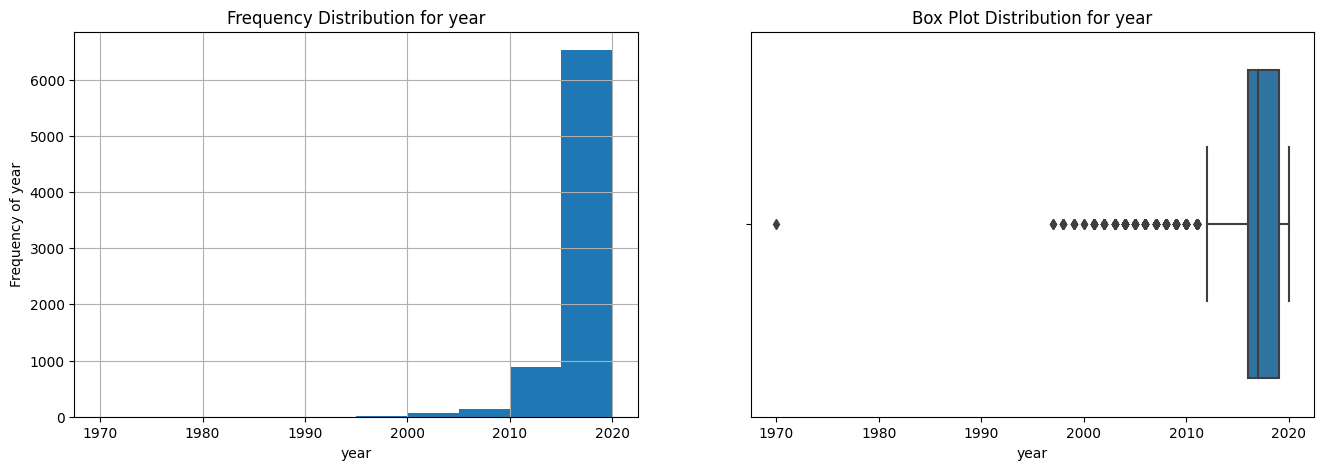

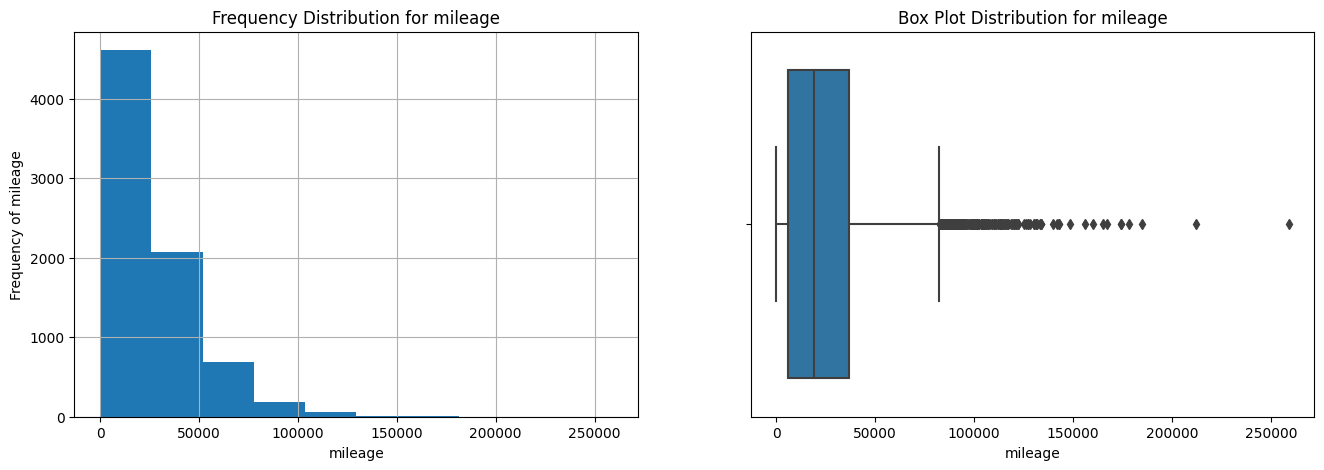

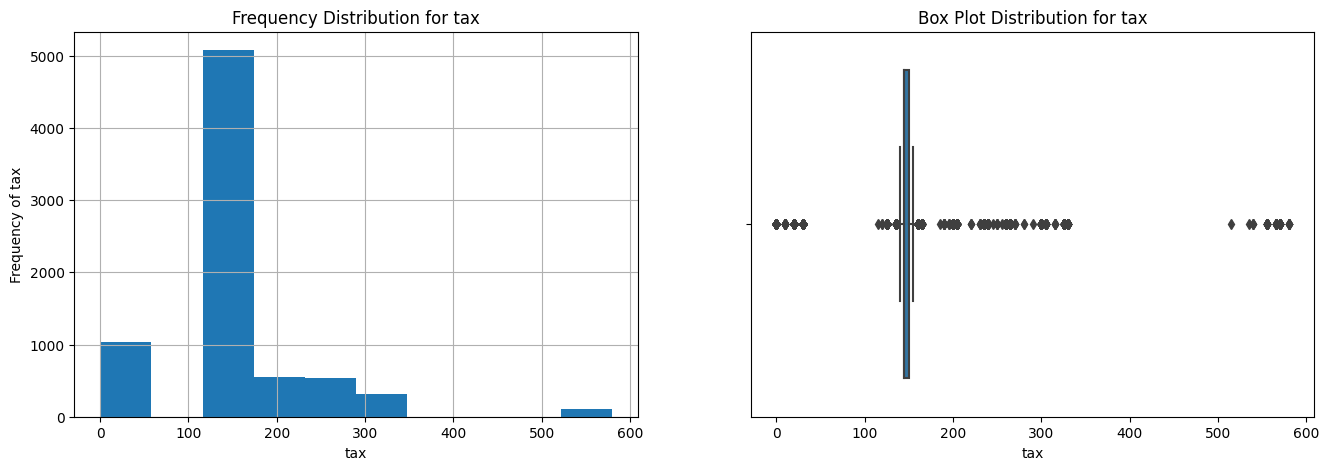

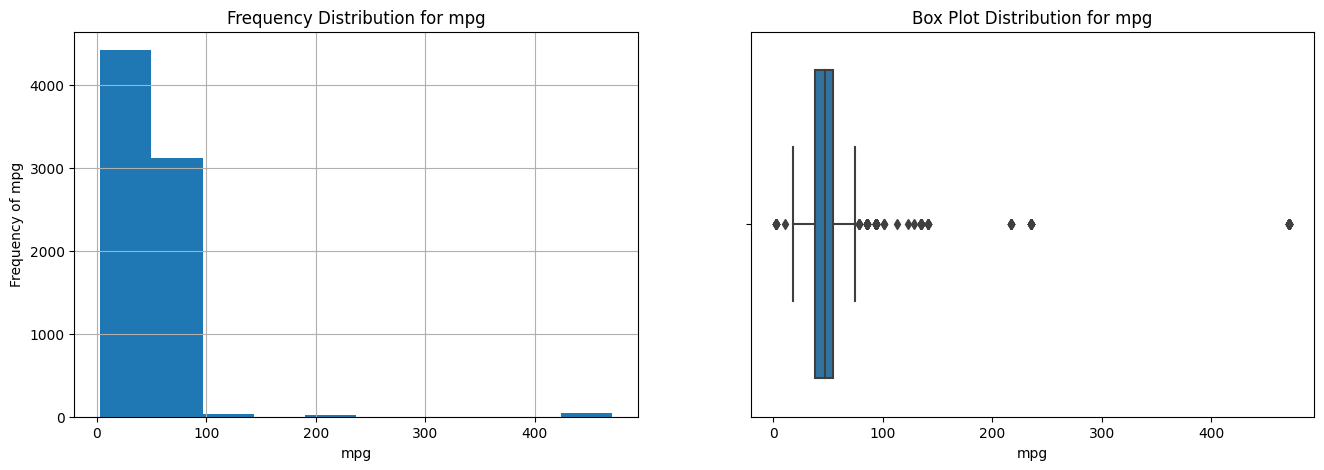

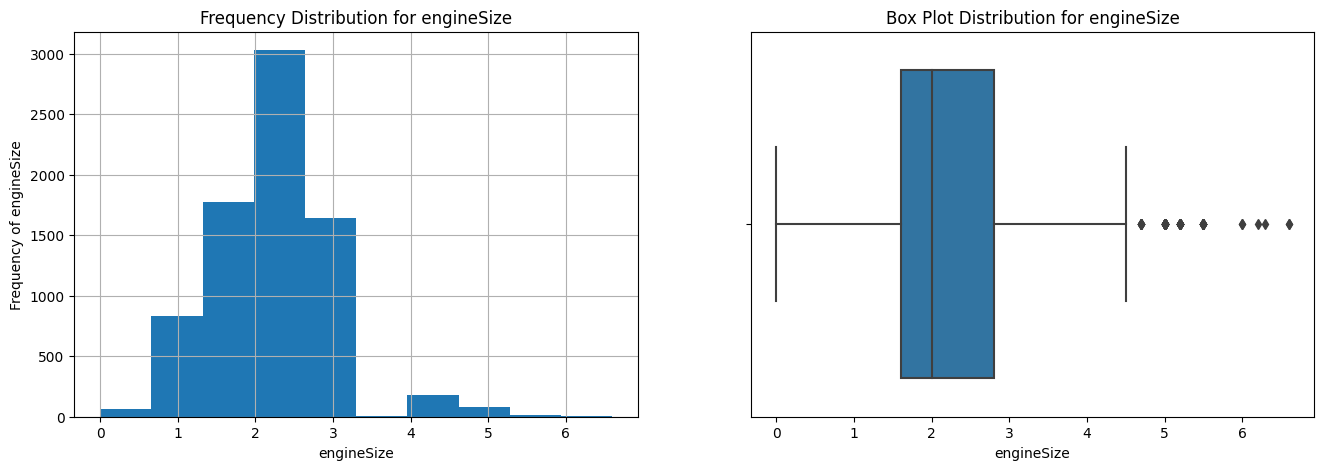

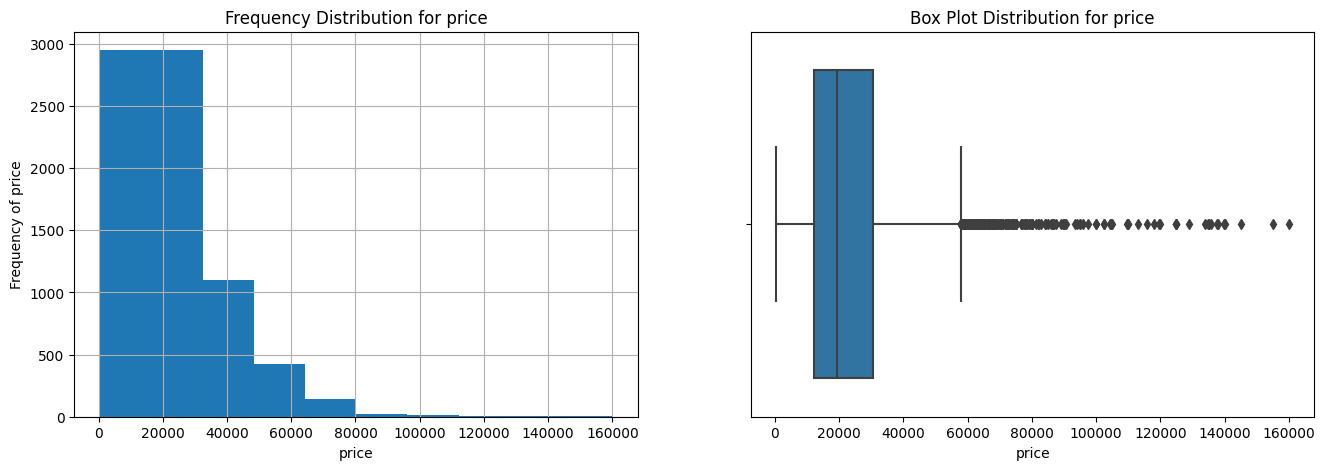

In [12]:
for col in continuous_col:
    plt.figure(figsize = [16,5])    #figure size
    plt.subplot(1,2,1)  #subplot 1
    # Plotting the freq distibution for 'col'
    plt.hist(data[col])
    # To bring the grid structure out of the data
    plt.grid();
    # Label the x axis
    plt.xlabel(col)
    # Label the y axis
    plt.ylabel("Frequency of {}".format(col))
    # Giving a title on the top
    plt.title("Frequency Distribution for {}".format(col))
    plt.subplot(1,2,2)
    sns.boxplot(data = data, x =col)
    plt.title("Box Plot Distribution for {}".format(col))
    # to remove the array data
    plt.show();

**Observations:-**
- Most of the cars are between 2015 to 2020.There are some outliers as some cars manufactured before 2012.
- Histogram for price is right skewed,most of the cars price is between 20k to 35k USD.
- A few outliers in milage column, some cars run 200-400 mpg(mile-per-gallon).

# **categorical column**

In [13]:
#To check values in each categorical column
for col in categorical_col:
 print("*"*50)
 print("value counts for {} is ".format(col))
 print(data[col].value_counts())

**************************************************
value counts for brand is 
merc        1219
ford        1196
vw          1159
bmw          978
hyundi       817
toyota       717
skoda        638
audi         523
vauxhall     385
Name: brand, dtype: int64
**************************************************
value counts for model is 
 Arteon         248
 Grand C-MAX    247
 Santa Fe       245
 Scirocco       242
 CLS Class      237
               ... 
 Z3               7
 CLK              7
 Eos              7
 Caddy            6
 Getz             6
Name: model, Length: 90, dtype: int64
**************************************************
value counts for transmission is 
Manual       2937
Automatic    2588
Semi-Auto    2105
Other           2
Name: transmission, dtype: int64
**************************************************
value counts for fuelType is 
Diesel      4651
Petrol      2655
Hybrid       287
Other         36
Electric       3
Name: fuelType, dtype: int64


In [14]:
#cateogorical columns
categorical_col

['brand', 'model', 'transmission', 'fuelType']

In [15]:
#after remove model from categorical column to better visualisation
categorical_col_1=['brand', 'transmission', 'fuelType']

# Univariate analysis for categorical columns
- using pie chart and countplot


**************************************************
distributions for category brand is 
 merc        1219
ford        1196
vw          1159
bmw          978
hyundi       817
toyota       717
skoda        638
audi         523
vauxhall     385
Name: brand, dtype: int64


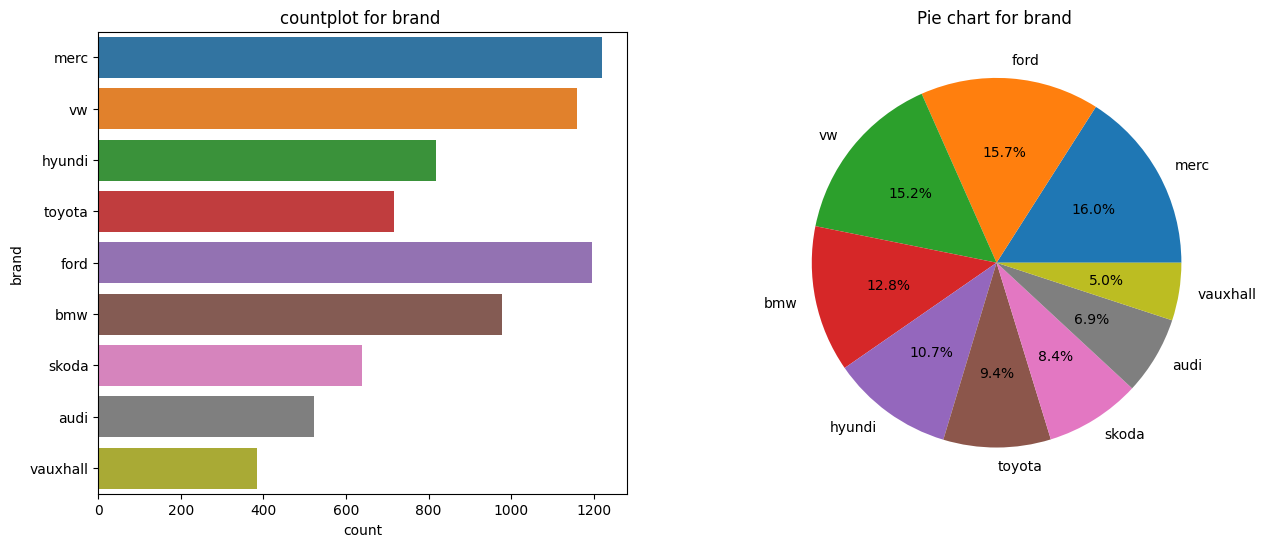

**************************************************
distributions for category transmission is 
 Manual       2937
Automatic    2588
Semi-Auto    2105
Other           2
Name: transmission, dtype: int64


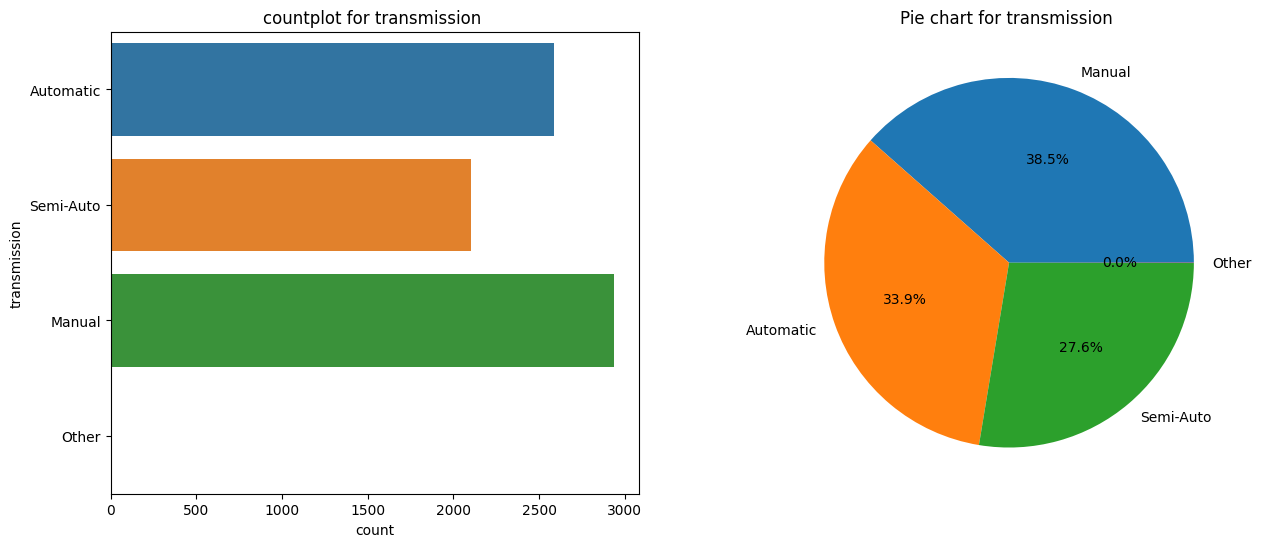

**************************************************
distributions for category fuelType is 
 Diesel      4651
Petrol      2655
Hybrid       287
Other         36
Electric       3
Name: fuelType, dtype: int64


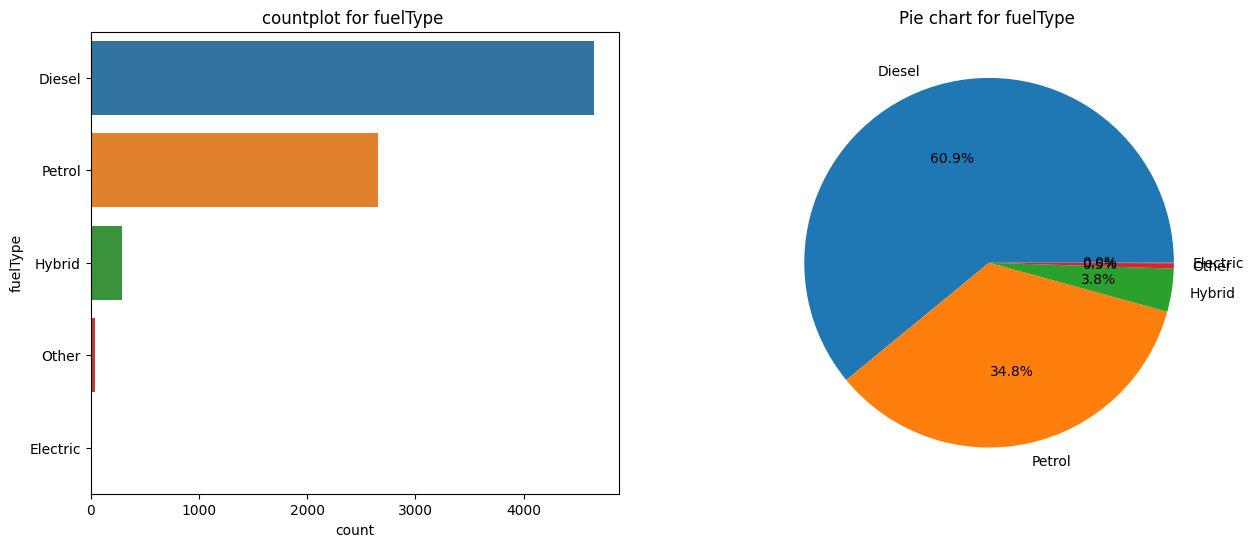

In [16]:
for col in categorical_col_1:   #looping for each column in categorical column
    print("*"*50)
    print("distributions for category {} is \n" .format(col),data[col].value_counts())  #value distribution for each category
    plt.figure(figsize=[15,6])  #figure size
    plt.subplot(1,2,1)  #subplot 1
    sns.countplot(data,y=col)   #countplot for all columns
    plt.title("countplot for {} ".format(col))

    plt.subplot(1,2,2)  #subplot 2
    mylabels=data[col].value_counts().index #labeles for pie chart
    y=data[col].value_counts().values   #values for each label in pie chart
    plt.pie(y,labels=mylabels,autopct="%1.1f%%")    #ploting pie chart
    plt.title("Pie chart for {} ".format(col))
    plt.show(); #to remove arrays in output

- **Price vs fuel type**

<Axes: xlabel='fuelType', ylabel='price'>

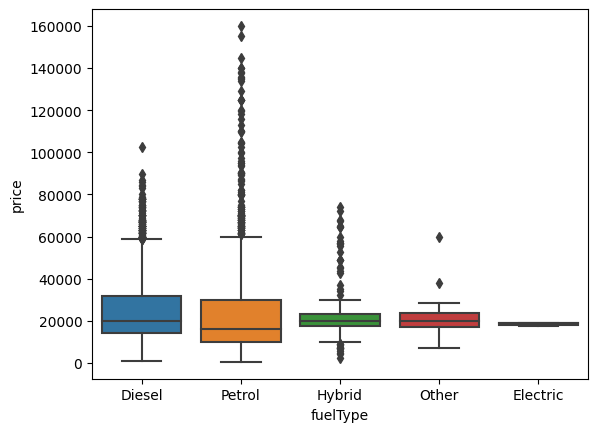

In [17]:
#price comparision with each fuel type models
sns.boxplot(x ="fuelType", y ="price",data =data)

- **Price vs Brand**

<Axes: xlabel='brand', ylabel='price'>

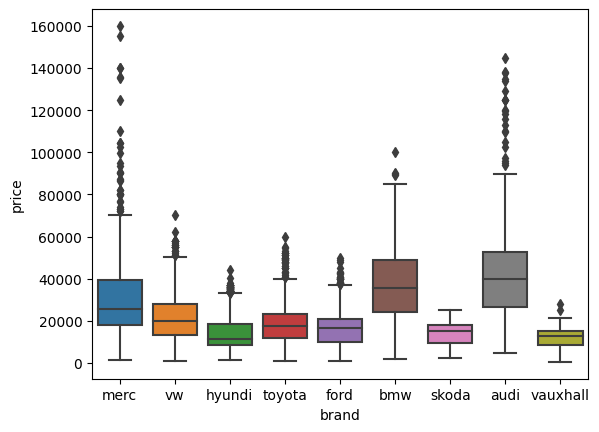

In [18]:
sns.boxplot(x ="brand", y ="price",data =data)

# **Observation:-**
- Most of the cars, almost 60% are operated by Diesel.
- Price of Electric vehicle is much less as compared to others.
- Price of diesel and petrol car is much higher than others,outliers are also detecting.
- Audi is most expensive with some outliers and vauxhell is most affordable brand.

# **Model**

# Feature encoding
- Machine only aknowledge continuous data, we need to encode object type data into continuous

In [19]:
data.dtypes

brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
price             int64
dtype: object

- **Label encoding**
- We will use label encoder to encode categorical column into continuous

In [20]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [21]:
for col in categorical_col:
    data[col]=encoder.fit_transform(data[col])

In [22]:
data.corr()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
brand,1.000000,-0.093615,-0.006976,-0.086250,0.032212,-0.037775,-0.086550,-0.006525,-0.321437,-0.291048
model,-0.093615,1.000000,0.038252,0.038095,-0.061853,0.145478,-0.002209,0.096490,-0.094664,0.069008
year,-0.006976,0.038252,1.000000,0.187686,-0.753325,-0.060241,-0.200159,-0.040006,0.032041,0.498388
transmission,-0.086250,0.038095,0.187686,1.000000,-0.173706,0.014936,-0.003497,-0.133905,0.118333,0.210677
mileage,0.032212,-0.061853,-0.753325,-0.173706,1.000000,-0.110738,0.124939,0.075106,-0.018777,-0.486950
fuelType,-0.037775,0.145478,-0.060241,0.014936,-0.110738,1.000000,0.053483,-0.036772,-0.159256,-0.042186
tax,-0.086550,-0.002209,-0.200159,-0.003497,0.124939,0.053483,1.000000,-0.311065,0.456532,0.142273
mpg,-0.006525,0.096490,-0.040006,-0.133905,0.075106,-0.036772,-0.311065,1.000000,-0.353857,-0.178982
engineSize,-0.321437,-0.094664,0.032041,0.118333,-0.018777,-0.159256,0.456532,-0.353857,1.000000,0.623995
price,-0.291048,0.069008,0.498388,0.210677,-0.486950,-0.042186,0.142273,-0.178982,0.623995,1.000000


<Axes: >

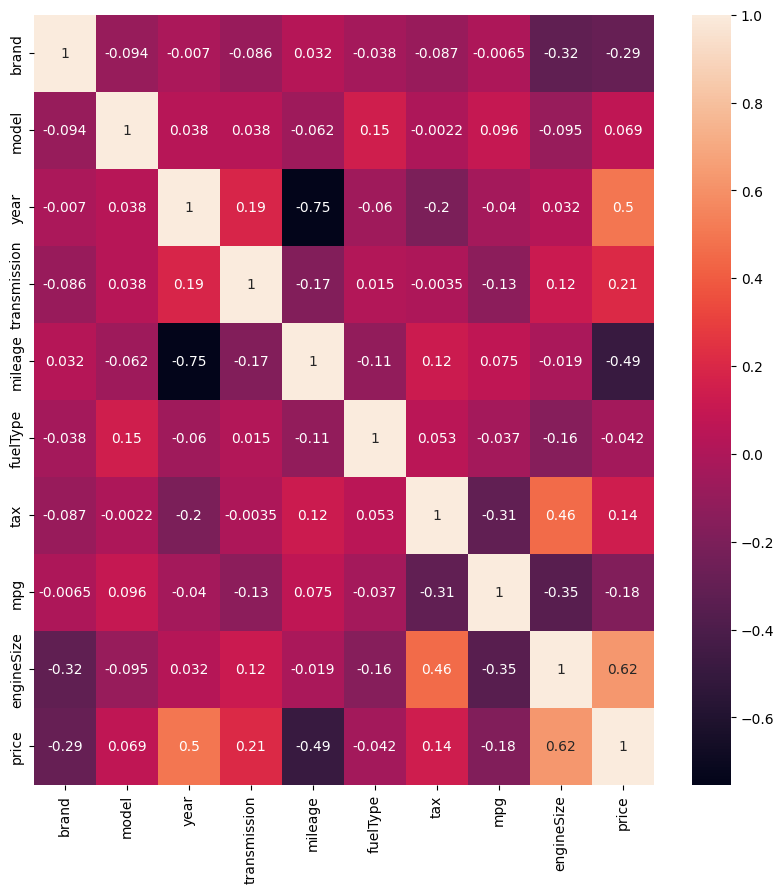

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

- **checking if encoding is done**

In [24]:
data

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,4,28,2017,0,12046,0,150,37.2,3.0,38000
1,8,6,2017,0,37683,0,260,36.2,3.0,23495
2,3,69,2017,3,32467,0,235,42.8,2.2,18991
3,8,8,2019,0,1555,4,145,40.4,1.5,22500
4,4,28,2019,0,10000,0,145,34.0,3.0,59999
...,...,...,...,...,...,...,...,...,...,...
7627,6,29,2014,1,18389,4,260,36.2,2.0,14999
7628,5,61,2019,1,12850,4,145,58.9,1.0,9545
7629,2,22,2017,1,9975,0,145,48.7,2.0,21333
7630,4,12,2016,0,25726,4,200,41.5,2.0,18700


- **Preparing train and test data**

In [26]:
from sklearn.model_selection import train_test_split    #importing train test split
x=data.drop(["price"],axis=1)   # Except for price all the other data is my features. Hence, we need to drop it.
y=data["price"]                         # price is the target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)     #telling our model that 80% is training data and 20% is test data

In [27]:
data.shape

(7632, 10)

In [28]:
x_train.shape

(6105, 9)

In [29]:
x_test.shape

(1527, 9)

In [30]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [31]:
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

((4884, 9), (1221, 9), (1527, 9), (4884,), (1221,), (1527,))

- **Normalization of features by standard scaler**

In [32]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_val=scale.transform(x_val)
x_test=scale.transform(x_test)

# Importing all regression model

In [33]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [34]:
from sklearn.linear_model import LinearRegression   #importing linearregression model
from sklearn.linear_model import Ridge  #importing Ridge
from sklearn.linear_model import Lasso  #importing Lasso
from sklearn.linear_model import ElasticNet #importing Elasticnet
from sklearn.svm import SVR #importing svr
from sklearn.ensemble import RandomForestRegressor #importing Random_forest
from sklearn.tree import DecisionTreeRegressor #importing Decision tree
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

- **KPI**

In [40]:
#importing performance metrics
from sklearn.metrics import r2_score,mean_squared_error

In [41]:
import math
from math import sqrt

In [42]:
r2_score_list_test=[]    #list to store r2 score of test data for all model
r2_score_list_val=[]    #list to store r2 score of val data for all model
r2_score_list_train=[]  #list to store r2 score of train data for all model
mean_sqr_error_test=[]   #list to store mean squared error of test data for all model
mean_sqr_error_val=[]   #list to store mean squared error of val data for all model
mean_sqr_error_train=[] #list to store mean squared error of train data for all model
r_mean_sqr_error_train=[]
r_mean_sqr_error_val=[]
r_mean_sqr_error_test=[]

#model list
model_list=[LinearRegression(),
               Ridge(),
               Lasso(),
               ElasticNet(),
            SVR(kernel='linear'),
            RandomForestRegressor(),
            DecisionTreeRegressor(),
            KNeighborsRegressor(),
            CatBoostRegressor()
               ]
for model in model_list:    #looping each model
    model.fit(x_train,y_train)  #training to each model with training data
    test_predtiction=model.predict(x_test)  #prediction on test data
    val_predtiction=model.predict(x_val)  #prediction on val data
    train_prediction=model.predict(x_train) #prediction on train data
    r2_score_list_test.append(r2_score(y_test,test_predtiction))    #r2 score for test data
    r2_score_list_val.append(r2_score(y_val,val_predtiction))    #r2 score for val data
    r2_score_list_train.append(r2_score(y_train,train_prediction))   #r2 score for train data
    mean_sqr_error_test.append(mean_squared_error(y_test,test_predtiction))    #MSA on test data
    mean_sqr_error_val.append(mean_squared_error(y_val,val_predtiction))    #MSA on test data
    mean_sqr_error_train.append(mean_squared_error(y_train,train_prediction))   #MSA on train data

    r_mean_sqr_error_test.append(sqrt(mean_squared_error(y_test,test_predtiction)))
    r_mean_sqr_error_val.append(sqrt(mean_squared_error(y_val,val_predtiction)))
    r_mean_sqr_error_train.append(sqrt(mean_squared_error(y_train,train_prediction)))


Learning rate set to 0.052602
0:	learn: 15848.7212833	total: 48.7ms	remaining: 48.6s
1:	learn: 15274.8900459	total: 50.1ms	remaining: 25s
2:	learn: 14747.4137645	total: 51.6ms	remaining: 17.1s
3:	learn: 14248.5641246	total: 53.2ms	remaining: 13.2s
4:	learn: 13791.9916982	total: 54.9ms	remaining: 10.9s
5:	learn: 13346.4684654	total: 56.6ms	remaining: 9.37s
6:	learn: 12933.6485593	total: 58ms	remaining: 8.23s
7:	learn: 12546.9600186	total: 59.4ms	remaining: 7.36s
8:	learn: 12165.2308994	total: 61ms	remaining: 6.71s
9:	learn: 11789.2235845	total: 62.4ms	remaining: 6.17s
10:	learn: 11470.2935222	total: 64ms	remaining: 5.75s
11:	learn: 11144.2599681	total: 65.4ms	remaining: 5.38s
12:	learn: 10853.8910609	total: 67.1ms	remaining: 5.09s
13:	learn: 10564.3853580	total: 68.7ms	remaining: 4.84s
14:	learn: 10273.7021966	total: 70.3ms	remaining: 4.62s
15:	learn: 10034.2190254	total: 72ms	remaining: 4.42s
16:	learn: 9809.8678301	total: 73.6ms	remaining: 4.26s
17:	learn: 9578.6371442	total: 75ms	rem

In [43]:
#DataFrame to store r2_score of all the models
r2_score_df=pd.DataFrame({"model":model_list,
                                "r2_score_train":r2_score_list_train,
                                "r2_score_val":r2_score_list_val,
                                "r2_score_test":r2_score_list_test})

In [44]:
#DataFrame to store MSA of all the models
mse_score_df=pd.DataFrame({"model":model_list,
                                "mean_squared_error_train":mean_sqr_error_train,
                                "mean_squared_error_val":mean_sqr_error_val,
                                "mean_squared_error_test":mean_sqr_error_test})

In [45]:
#DataFrame to store MSA of all the models
r_mse_score_df=pd.DataFrame({"model":model_list,
                                "r_mean_squared_error_train":r_mean_sqr_error_train,
                                "r_mean_squared_error_val":r_mean_sqr_error_val,
                                "r_mean_squared_error_test":r_mean_sqr_error_test})

In [46]:
r2_score_df

,model,r2_score_train,r2_score_val,r2_score_test
0,LinearRegression(),0.670051,0.671612,0.679063
1,Ridge(),0.670051,0.671632,0.679054
2,Lasso(),0.670051,0.671625,0.679053
3,ElasticNet(),0.612086,0.631729,0.609414
4,SVR(kernel='linear'),0.290138,0.307354,0.281494
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993494,0.960010,0.941486
6,DecisionTreeRegressor(),0.999772,0.936918,0.930861
7,KNeighborsRegressor(),0.945970,0.919575,0.903381
8,<catboost.core.CatBoostRegressor object at 0x7...,0.984669,0.969841,0.965370


In [47]:
mse_score_df

,model,mean_squared_error_train,mean_squared_error_val,mean_squared_error_test
0,LinearRegression(),8.932186e+07,8.088725e+07,9.418113e+07
1,Ridge(),8.932187e+07,8.088243e+07,9.418380e+07
2,Lasso(),8.932187e+07,8.088402e+07,9.418414e+07
3,ElasticNet(),1.050140e+08,9.071127e+07,1.146202e+08
4,SVR(kernel='linear'),1.921696e+08,1.706101e+08,2.108502e+08
5,"(DecisionTreeRegressor(max_features=1.0, rando...",1.761339e+06,9.850176e+06,1.717120e+07
6,DecisionTreeRegressor(),6.158763e+04,1.553808e+07,2.028937e+07
7,KNeighborsRegressor(),1.462671e+07,1.980992e+07,2.835342e+07
8,<catboost.core.CatBoostRegressor object at 0x7...,4.150296e+06,7.428713e+06,1.016242e+07


In [48]:
r_mse_score_df

,model,r_mean_squared_error_train,r_mean_squared_error_val,r_mean_squared_error_test
0,LinearRegression(),9451.024514,8993.733712,9704.696425
1,Ridge(),9451.024986,8993.465741,9704.834074
2,Lasso(),9451.025014,8993.554548,9704.851383
3,ElasticNet(),10247.632543,9524.246179,10706.080281
4,SVR(kernel='linear'),13862.526201,13061.781222,14520.682355
5,"(DecisionTreeRegressor(max_features=1.0, rando...",1327.154350,3138.498993,4143.814890
6,DecisionTreeRegressor(),248.168543,3941.837704,4504.371774
7,KNeighborsRegressor(),3824.488815,4450.833654,5324.792860
8,<catboost.core.CatBoostRegressor object at 0x7...,2037.227425,2725.566482,3187.855860


# **Observation**
- Based on the R-squared (R2) scores and root mean squared error (RMSE) for the various
machine learning regression models, we can draw the following conclusions to identify
the best model:
R-squared (R2) Scores:
- The "CatBoost Regressor" achieved the highest R2 score on the test dataset, indicating that it provides the best fit to the data, with an R2 score of 0.965815.

- The Random Forest regressor had a relatively high R2 score of 0.948878 on the test dataset.
- The "Decision Tree Regressor" also had a high R2 score on the test dataset, with a value of 0.921804.
- The R2 scores of "Lasso Regression" and "Ridge Regression" are lower than those of the Decision Tree models.

# SHAP analysis
- We wil use feature importance in model by SHAP analysis.

- SHAP (SHapley Additive exPlanations) is a framework for explaining machine learning model predictions. It uses Shapley values to determine the influence of each input feature on a prediction. SHAP is model-agnostic and can be used to understand feature importance, visualize contributions, and improve model transparency. It has applications in various fields, including finance, healthcare, and fairness auditing. It's a valuable tool for making model predictions more interpretable.

In [55]:
#imstalling shap
!pip install shap
import shap

- **SHAP Analysis of catboost regressor**

Learning rate set to 0.052602
0:	learn: 15848.7212833	total: 2.33ms	remaining: 2.33s
1:	learn: 15274.8900459	total: 3.86ms	remaining: 1.93s
2:	learn: 14747.4137645	total: 5.35ms	remaining: 1.78s
3:	learn: 14248.5641246	total: 7ms	remaining: 1.74s
4:	learn: 13791.9916982	total: 8.43ms	remaining: 1.68s
5:	learn: 13346.4684654	total: 10.1ms	remaining: 1.67s
6:	learn: 12933.6485593	total: 13.1ms	remaining: 1.85s
7:	learn: 12546.9600186	total: 17.7ms	remaining: 2.2s
8:	learn: 12165.2308994	total: 19.4ms	remaining: 2.14s
9:	learn: 11789.2235845	total: 21.2ms	remaining: 2.1s
10:	learn: 11470.2935222	total: 23ms	remaining: 2.06s
11:	learn: 11144.2599681	total: 24.4ms	remaining: 2.01s
12:	learn: 10853.8910609	total: 27.2ms	remaining: 2.07s
13:	learn: 10564.3853580	total: 28.9ms	remaining: 2.04s
14:	learn: 10273.7021966	total: 30.6ms	remaining: 2.01s
15:	learn: 10034.2190254	total: 32ms	remaining: 1.97s
16:	learn: 9809.8678301	total: 33.5ms	remaining: 1.94s
17:	learn: 9578.6371442	total: 34.9ms	

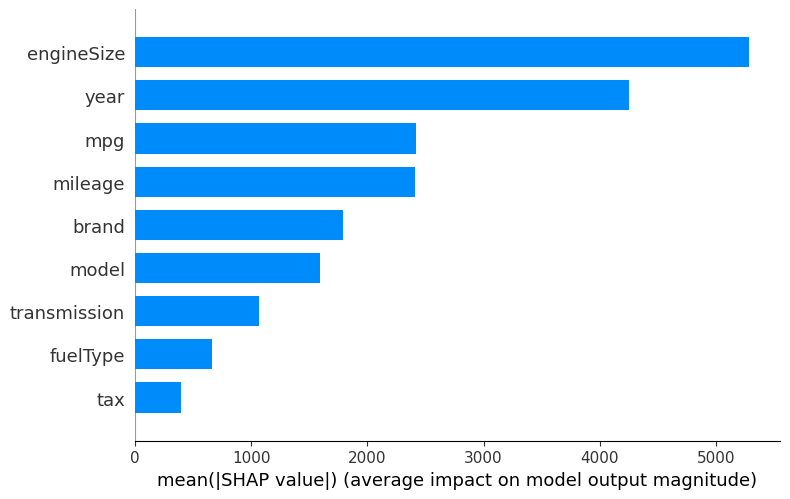

In [67]:
# Create and train the CatBoost model
final_model = CatBoostRegressor()
final_model.fit(x_train, y_train)

# Creating a SHAP explainer
explainer = shap.Explainer(final_model)

# Calculating SHAP values for a specific instance
shap_values = explainer.shap_values(x_test)

# Visualize the SHAP values to understand feature importance
shap.summary_plot(shap_values, x_test,feature_names=x.columns, plot_type="bar")

SHAP analysis showing how each feature influencing model to predict result.
Top features are:-

- engineSize
- year
- mpg
- mileage


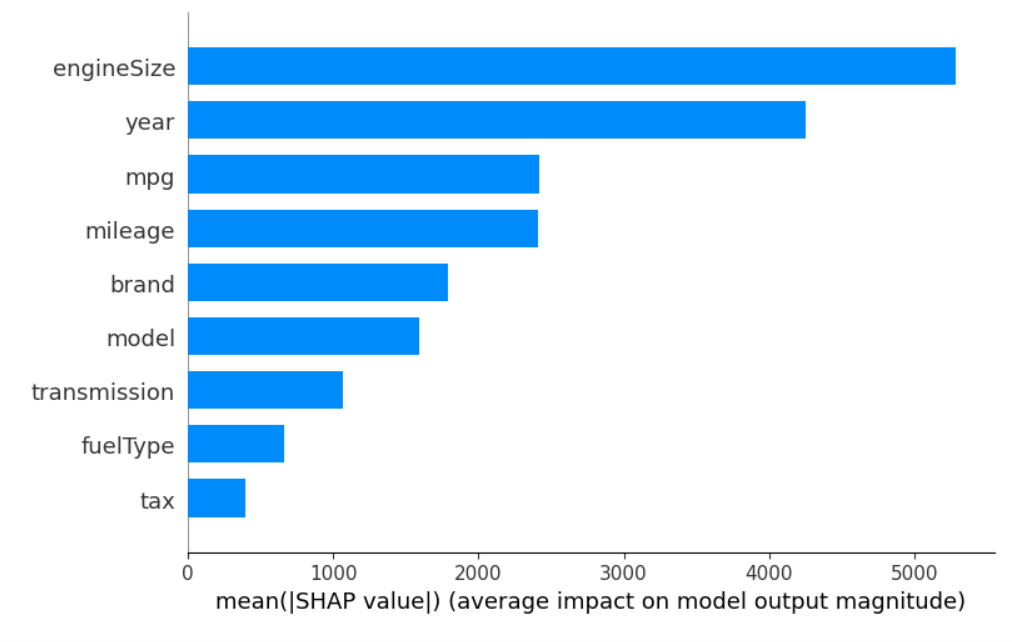